# Quora question pair analysis using Bag-of-Words with advance features

## Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import re
from bs4 import BeautifulSoup


In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

!pip install distance
import distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:

!pip install fuzzywuzzy
import fuzzywuzzy

!pip install fuzz
import fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from fuzzywuzzy import process

In [6]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
print("All the required libraries are imported successfully!")

All the required libraries are imported successfully!


## Read the Dataset

In [9]:
!unzip /content/drive/MyDrive/project/dataset.csv.zip

Archive:  /content/drive/MyDrive/project/dataset.csv.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset.csv             


In [10]:
url="/content/dataset.csv"
data=pd.read_csv(url)
print("Dataset is read successfully!")

Dataset is read successfully!


In [14]:
print("The dataset of quora is given by: ")
data.head()

The dataset of quora is given by: 


id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

## Preprocessing

Preprocessing:

*   Removing html tags
*   Removing Punctuations
*   Performing stemming
*   Removing Stopwords
*   Expanding contractions etc.











In [11]:
def preprocess(qs):

  # 1.Replace all upper case letter to lower case
  
  qs=str(qs).lower().strip()

  # 2. Replace certain special characters with their string equivalents

  qs= qs.replace('!' , 'exc')
  qs= qs.replace('@' , "at ")
  qs= qs.replace('#' , 'hash')
  qs= qs.replace('$' , 'dollar')
  qs= qs.replace('%' ,'percent')
  qs= qs.replace('₹', ' rupee ')
  qs= qs.replace('€', ' euro ')
  qs= qs.replace('^' , 'upar')
  qs= qs.replace('&' , 'amp')
  qs= qs.replace('*' , 'star')
  qs= qs.replace('-' , 'minus')
  qs= qs.replace('+' , 'plus')
  qs= qs.replace('=' , 'equal')
  qs= qs.replace('_' , 'underscore')
  qs= qs.replace('/' , 'slash')
  qs= qs.replace('?' , 'question')
  qs= qs.replace('<' , 'lessthan')
  qs= qs.replace('>' , 'greaterthan')

  # 3. Replace pattern '[Math]' as it has appeared 900 times in the whole dataset.
  
  qs= qs.replace('[math]' , 'math')

  # 4. Replacing some numbers with their equivalent character (not accurate)

  qs = qs.replace(',000,000,000 ', 'b ')
  qs = qs.replace(',000,000 ', 'm ')
  qs = qs.replace(',000 ', 'k ')
  qs = re.sub(r'([0-9]+)000000000', r'\1b', qs)
  qs = re.sub(r'([0-9]+)000000', r'\1m', qs)
  qs = re.sub(r'([0-9]+)000', r'\1k', qs)


  # 5. Decontracting words
  # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
  # https://stackoverflow.com/a/19794953
  contractions ={
      "a'ight" : "alright",
      "ain't" :	 "am not or is not or are not or has not or have not or did not",
      "amn't" :	"am not",
      "n" : "and",
      "arencha" : "are not you",
      "aren’t you" : "are not you",
      "aren't": "are not",
      "‘bout" :	"about",
      "can't" :	"cannot",
      "cap’n" :	"captain",
      "'cause" : "because",
      "’cept" :	"except",
      "could've" :	"could have",
      "couldn't" :	"could not",
      "couldn't've" :	"could not have",
      "cuppa" :	"cup of",
      "dammit" : "damn it",
      "daren't" :	"dare not or dared not", 
      "daresn't" : "dare not",
      "dasn't" :	"dare not",
      "didn't" :	"did not",
      "doesn't" :	"does not",
      "don't" :	"do not or does not", 
      "dunno" :	"do not know",
      "don't know" : "do not know",
      "d'ye" : 	"do you or did you",
      "d'ya" :	"do you or did you",
      "e'en" : 	"even",
      "e'er" : 	"ever",
      "'em" :	"them",
      "everybody's" :	"everybody is",
      "everyone's" :	"everyone is",
      "finna" :	"fixing to",
      "fo’c’sle" : "forecastle",
      "’gainst" :	"against",
      "g'day" : "good day",
      "gimme" : "give me",
      "giv'n" : "given",
      "gi'z" :	"give us or give me",
      "gonna" :	"going to",
      "gon't" : "go not", 
      "gotta" :	"got to",
      "hadn't" :	"had not",
      "had've" :	"had have",
      "hasn't" :	"has not",
      "haven't" :	"have not",
      "he'd" :	"he had or he would",
      "he'll" :	"he shall or he will",
      "helluva" : "hell of a",
      "he's" :	"he has or he is",
      "here's" :	"here is",
      "how'd" :	"how did or how would",
      "howdy" : "how do you do or how do you fare",
      "how'll" : "how will",
      "how're" :	"how are",
      "how's" :	"how has or how is or how does",
      "I'd" :	"I had or I would",
      "I'd've" :	"I would have",
      "I'd'nt" :	"I would not",
      "I'd'nt've" : "I would not have",
      "I'll" :	"I shall or I will",
      "I'm" :	"I am",
      "Imma" : "I am about to or I am going to",
      "I'm'o" :	"I am going to",
      "innit" : "isn't it",
      "Ion" : "I don't or I do not",
      "I've" :	"I have",
      "isn't" :	"is not",
      "it'd" :	"it would",
      "it'll" :	"it shall or it will",
      "it's" :	"it has or it is",
      "Idunno" : "I donot know",
      "kinda" : "kind of",
      "let's" :	"let us",
      "loven't" :	"love not", 
      "ma'am " :	"madam",
      "mayn't" :	"may not",
      "may've" :	"may have",
      "methinks" :	"I think",
      "mightn't" :	"might not",
      "might've" :	"might have",
      "mustn't" :	"must not",
      "mustn't've" :	"must not have", 
      "must've"	: "must have",
      "‘neath" :	"beneath",
      "needn't" :	"need not",
      "nal" :	"and all",
      "ne'er" : "never",
      "o'clock" :	"of the clock",
      "o'er" :	"over",
      "ol'" :	"old",
      "ought've" :	"ought have",
      "oughtn't" :	"ought not", 
      "oughtn't've" :	"ought not have",
      "‘round" :	"around",
      "'s" :	"is or has or does or us",
      "shalln't" :	"shall not", 
      "shan't" : "shall not",
      "she'd" :	"she had or she would",
      "she'll" :	"she shall or she will",
      "she's" :	"she has or she is",
      "should've" :	"should have",
      "shouldn't" :	"should not",
      "shouldn't've" :	"should not have",
      "somebody's" :	"somebody has or somebody is",
      "someone's" :	"someone has or someone is",
      "something's"	 : "something has or something is",
      "so're" :	"so are",
      "so’s" : "so is or so has",
      "so’ve" :	"so have",
      "that'll" : "that shall or that will",
      "that're" : "that are",
      "that's" :	"that has or that is",
      "that'd" :	"that would or that had",
      "there'd" :	"there had or there would",
      "there'll" :	"there shall or there will",
      "there're" :	"there are",
      "there's" :	"there has or there is",
      "these're" :	"these are",
      "these've" :	"these have",
      "they'd" :	"they had or they would",
      "they'll" :	"they shall or they will",
      "they're" :	"they are or they were",
      "they've" :	"they have",
      "this's"	: "this has or this is",
      "those're" :	"those are",
      "those've" : 	"those have",
      "'thout" : 	"without",
      "’til" :	"until",
      "'tis" : "it is",
      "to've" : "to have",
      "'twas" : "it was",
      "'tween" : 	"between",
      "'twere" :	"it were",
      "w'all"	: "we all",
      "w'at" :	"we at",
      "wanna" :	"want to",
      "wasn't" :	"was not",
      "we'd" :	"we had or we would or we did",
      "we'd've" :	"we would have",
      "we'll" :	"we shall or we will",
      "we're" :	"we are",
      "we've" :	"we have",
      "weren't" :	"were not",
      "whatcha" :	"what are you or what about you ", 
      "what'd" :	"what did",
      "what'll" :	"what shall or what will",
      "what're"	: "what are or what were",
      "what's" :	"what has or what is or what does",
      "what've" :	"what have",
      "when's" :	"when has or when is",
      "where'd" :	"where did",
      "where'll" :	"where shall or where will",
      "where're" :	"where are",
      "where's" :	"where has or where is or where does",
      "where've" :	"where have",
      "which'd" :	"which had or which would",
      "which'll" :	"which shall or which will",
      "which're" :	"which are",
      "which's" :	"which has or which is",
      "which've" :	"which have",
      "who'd" :	"who would or who had or who did",
      "who'd've" :	"who would have",
      "who'll" :	"who shall or who will",
      "who're" :	"who are",
      "who's" :	"who has or who is or who does",
      "who've" :	"who have",
       "why'd" :	"why did",
      "why're" :	"why are",
      "why's" :	"why has or why is or why does",
      "willn't" :	"will not", 
      "won't" :	"will not",
      "wonnot" :	"will not", 
      "would've" :	"would have",
      "wouldn't" :	"would not",
      "wouldn't've" :	"would not have",
      "y'ain't" :	"you are not or you have not or you did not", 
      "y'all" :	"you all", 
      "y'all'd've" : 	"you all would have", 
      "y'all'd'n't've" :	"you all would not have", 
      "y'all're" :	"you all are", 
      "y'all'ren't" :	"you all are not", 
      "y'at" :	"you at",
      "yes’m" :	"yes ma’am or yes madam",
      "y'know" :	"you know",
      "yessir":	"yes sir",
      "you'd" :	"you had or you would",
      "you'll" :	"you shall or you will",
      "you're" : "you are",
      "you've" : "you have",
      "when'd" :	"when did",
      "willn't" :	"will not",
  }
   
  qs_decontracted = []

  for word in qs.split():
      if word in contractions:
          word = contractions[word]

      qs_decontracted.append(word)

  qs = ' '.join(qs_decontracted)
  qs = qs.replace("'ve", " have")
  qs = qs.replace("n't", " not")
  qs = qs.replace("'re", " are")
  qs = qs.replace("'ll", " will")

  # 6. Removing HTML tags
  qs = BeautifulSoup(qs)
  qs = qs.get_text()
    
  # 7. Remove punctuations
  pattern = re.compile('\W')
  qs = re.sub(pattern, ' ', qs).strip()

    
  return qs

In [97]:
preprocess("I've already ! wasn't < b > done < / b > ?")

'i have already exc was not lessthan b greaterthan done lessthan slash b greaterthan question'

In [98]:
preprocess("I won't let you get away with that")

'i will not let you get away with that'

In [99]:
preprocess ("I'm n't a bad person !") 

'i m  not a bad person exc'

In [12]:
data['question1'] = data['question1'].apply(preprocess)

In [13]:
data['question2'] = data['question2'].apply(preprocess)

In [18]:
print("After preprocessing the dataset looks like: \n")
data.head(10)

After preprocessing the dataset looks like: 



id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  kohminusiminusn...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonelyquestion how can ...   
4   4     9    10  which one dissolve in water quikly sugar  salt...   
5   5    11    12  astrology  i am a capricorn sun cap moon and c...   
6   6    13    14                         should i buy tiagoquestion   
7   7    15    16              how can i be a good geologistquestion   
8   8    17    18             when do you use シ instead of しquestion   
9   9    19    20  motorola  company   can i hack my charter moto...   

                                           question2  is_duplicate  
0  what is the step by step guide to invest in sh...             0  
1  what would happen if the indian government sto...             0  
2  how can internet speed be increased by hacking...             0  
3  find the remainder when math23upar 24  slashma...             0  
4     which fish would survive in salt waterquestion             0  
5  i m a triple capricorn  sun  moon and ascendan...             1  
6  what keeps childern active and far from phone ...             0  
7   what should i do to be a great geologistquestion             1  
8     when do you use  amp  instead of  and question             0  
9  how do i hack motorola dcx3400 for free intern...             0

In [14]:
new_data=data.sample(30000,random_state=2)

In [104]:
print("After sampling the dataset is given by: \n ")

new_data.head()

After sampling the dataset is given by: 
 


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086  i am poor but i want to invest  what should i ...   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235         consequences of bhopal gas tragedyquestion   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas trag...             0

## Basic Features

In [15]:
### 1. Length of the questions calculation

new_data["qs1_len"]=new_data["question1"].str.len()
new_data["qs2_len"]=new_data["question2"].str.len()


### 2. Number of words in the questions calculation


new_data["qs1_num_words"]=new_data["question1"].apply(lambda row: len(row.split(" ")))
new_data["qs2_num_words"]=new_data["question2"].apply(lambda row: len(row.split(" ")))



### 3. Number of common words calculations 

def common_words(row):
    wd1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    wd2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(wd1 & wd2)
new_data['word_common'] = new_data.apply(common_words, axis=1)



### 4. Total number of words( Question1 + Question2 ) calculation


def total_words(row):
  wd1=set(map(lambda word: word.lower().strip(), row["question1"].split()))
  wd2=set(map(lambda word: word.lower().strip(), row["question2"].split()))
  return(len(wd1)+len(wd2))

new_data['word_total'] = new_data.apply(total_words, axis=1)


### 5. Percentage of common words calculation

new_data["word_share"]=round(new_data['word_common']/new_data['word_total'],2)

print("After adding all new columns the dataset looks like: ")
new_data.head()


After adding all new columns the dataset looks like: 


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086  i am poor but i want to invest  what should i ...   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235         consequences of bhopal gas tragedyquestion   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas trag...             0   

        qs1_len  qs2_len  qs1_num_words  qs2_num_words  word_common  \
398782       87       88             12             12           11   
115086       56       64             13             16            8   
327711      112      127             28             21            4   
367788       66      153             14             32            1   
151235       42       57              5              9            3   

        word_total  word_share  
398782          24        0.46  
115086          23        0.35  
327711          36        0.11  
367788          32        0.03  
151235          13        0.23

## Advanced Features

## 1. Token Features:

   * **cwc_min:** This is the ratio of the number of common words to the length of the smaller question
       
      * **cwc_min = common_word_count / (min(len(qs1_num_words), len(qs2_num_words))**

   * **cwc_max:** This is the ratio of the number of common words to the length of the larger question
       
      * **cwc_max = common_word_count / (max(len(qs1_num_words), len(qs2_num_words))**

   * **csc_min:** This is the ratio of the number of common stop words to the smaller stop word count among the two questions

      * **csc_min = common_stop_count / (min(len(qs1_stops), len(qs2_stops))**

   * **csc_max:** This is the ratio of the number of common stop words to the larger stop word count among the two questions 

      * **csc_max = common_stop_count / (max(len(qs1_stops), len(qs2_stops))**

   * **ctc_min:** This is the ratio of the number of common tokens to the smaller token count among the two questions

      *  **last_word_eq = int(qs1_tokens[-1] == qs2_tokens[-1])**
       
   * **ctc_max:** This is the ratio of the number of common tokens to the larger token count among the two questions

      * **first_word_eq = int(qs1_tokens[0] == qs2_tokens[0])**

   * **last_word_eq:** 1 if the last word in the two questions is same, 0 otherwise

      * **last_word_eq = int(qs1_tokens[-1] == qs2_tokens[-1])**
       
       *   **first_word_eq:** 1 if the first word in the two questions is same, 0 otherwise

       * **first_word_eq = int(qs1_tokens[0] == qs2_tokens[0])**


## 2. Length Based Features

  * ** mean_len:** Mean of the length of the two questions (number of words)

      * **mean_len = (len(qs1_tokens) + len(qs2_tokens))/2**

  * **abs_len_diff:** Absolute difference between the length of the two questions (number of words)

       * **abs_len_diff = abs(len(qs1_tokens) — len(qs2_tokens))**

  * **longest_substr_ratio:** Ratio of the length of the longest substring among the two questions to the length of the smaller question

       * **longest_substr_ratio = len(longest common substring)/(min(len(qs1_tokens), len(qs2_tokens))**


## 3. Fuzzy Features

  * **fuzz_ratio:**The unique feature of ‘fuzz.ratio’ lies in the fact that it takes into consideration minimal differences existing between both strings.

      * **fuzz_ratio:fuzz.ratio(qs1.lower(),qs2.lower())**

  * **fuzz_partial_ratio:**It is used to handle the complex string comparison such as substring matching.

      * **fuzz_partial_ratio: fuzz.partial_ratio(qs1.lower(),qs2.lower())**
      
  * **token_sort_ratio:**string token sorted alphabetically and joined together.

      * **token_sort_ratio: tfuzz.token_sort_ratio(qs1,qs2)**

  * **token_set_ratio:**performs a set operation and takes out the common token and then makes ratio() pairwise comparison.

      * **token_set_ratio: fuzz.token_set_ratio(qs1,qs2) **











In [16]:

# Advanced Features

from nltk.corpus import stopwords
def fetch_token_features(row):
    qs_1 = row['question1']
    qs_2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    qs_1_tokens = qs_1.split()
    qs_2_tokens = qs_2.split()
    
    if len(qs_1_tokens) == 0 or len(qs_2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    qs_1_words = set([word for word in qs_1_tokens if word not in STOP_WORDS])
    qs_2_words = set([word for word in qs_2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    qs_1_stops = set([word for word in qs_1_tokens if word in STOP_WORDS])
    qs_2_stops = set([word for word in qs_2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(qs_1_words.intersection(qs_2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(qs_1_stops.intersection(qs_2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(qs_1_tokens).intersection(set(qs_2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(qs_1_words), len(qs_2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(qs_1_words), len(qs_2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(qs_1_stops), len(qs_2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(qs_1_stops), len(qs_2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(qs_1_tokens), len(qs_2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(qs_1_tokens), len(qs_2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(qs_1_tokens[-1] == qs_2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(qs_1_tokens[0] == qs_2_tokens[0])
    
    return token_features






In [17]:
token_features = new_data.apply(fetch_token_features, axis=1)

new_data["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_data["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_data["csc_min"]       = list(map(lambda x: x[2], token_features))
new_data["csc_max"]       = list(map(lambda x: x[3], token_features))
new_data["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_data["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_data["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_data["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [111]:
new_data[:]

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   
...        ...     ...     ...   
243932  243932   26193  356455   
91980    91980  154063  154064   
266955  266955  133017  384210   
71112    71112  122427  122428   
312470  312470  436915  436916   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086  i am poor but i want to invest  what should i ...   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235         consequences of bhopal gas tragedyquestion   
...                                                   ...   
243932  what are some good web scraping tutorialsquestion   
91980   can i apply for internet banking in sbi withou...   
266955  how much he laundry detergent do you use in a ...   
71112   what is the best way to understand and learn m...   
312470  what would the modiminusled government do in c...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas trag...             0   
...                                                   ...           ...   
243932   what are some good web scraping programsquestion             1   
91980   i have internet banking kit of sbi but it has ...             0   
266955  can i use regular dawn dishsoap in my dishwash...             0   
71112   what are some of the best ways to learn mathqu...             1   
312470  if pakistan mounts a 26slash11 type attack aga...             1   

        qs1_len  qs2_len  qs1_num_words  qs2_num_words  ...  word_total  \
398782       87       88             12             12  ...          24   
115086       56       64             13             16  ...          23   
327711      112      127             28             21  ...          36   
367788       66      153             14             32  ...          32   
151235       42       57              5              9  ...          13   
...         ...      ...            ...            ...  ...         ...   
243932       49       48              7              7  ...          14   
91980        75       79             12             17  ...          27   
266955       80      112             14             18  ...          30   
71112        58       52             10             10  ...          20   
312470      102       88             15             16  ...          29   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782        0.46  0.857131  0.857131  0.999980  0.999980  0.916659   
115086        0.35  0.749981  0.599988  0.666656  0.499994  0.583328   
327711        0.11  0.000000  0.000000  0.428565  0.299997  0.149999   
367788        0.03  0.000000  0.000000  0.000000  0.000000  0.000000   
151235        0.23  0.749981  0.599988  0.000000  0.000000  0.599988   
...            ...       ...       ...       ...       ...       ...   
243932        0.43  0.749981  0.749981  0.999967  0.999967  0.857131   
91980         0.15  0.499992  0.428565  0.199996  0.111110  0.333331   
266955        0.13  0.249997  0.249997  0.333328  0.249997  0.285712   
71112         0.25  0.499988  0.399992  0.599988  0.499992  0.499995   
312470        0.17  0.444440  0.399996  0.199996  0.199996  0.357140   

         ctc_max  last_word_eq  first_word_eq  
398782  0.916659           1.0            1.0  
115086  0.466664           1.0            1.0  
327711  0.115384           0.0            0.0  
367788  0.0

In [18]:
def fetch_length_features(row):
    
    qs_1 = row['question1']
    qs_2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    qs_1_tokens = qs_1.split()
    qs_2_tokens = qs_2.split()
    
    if len(qs_1_tokens) == 0 or len(qs_2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(qs_1_tokens) - len(qs_2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(qs_1_tokens) + len(qs_2_tokens))/2
    
    strs = list(distance.lcsubstrings(qs_1, qs_2))
    length_features[2] = len(strs[0]) / (min(len(qs_1), len(qs_2)) + 1)
    
    return length_features
    
length_features = new_data.apply(fetch_length_features, axis=1)

new_data['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_data['mean_len'] = list(map(lambda x: x[1], length_features))
new_data['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [113]:
new_data[:]

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   
...        ...     ...     ...   
243932  243932   26193  356455   
91980    91980  154063  154064   
266955  266955  133017  384210   
71112    71112  122427  122428   
312470  312470  436915  436916   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086  i am poor but i want to invest  what should i ...   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235         consequences of bhopal gas tragedyquestion   
...                                                   ...   
243932  what are some good web scraping tutorialsquestion   
91980   can i apply for internet banking in sbi withou...   
266955  how much he laundry detergent do you use in a ...   
71112   what is the best way to understand and learn m...   
312470  what would the modiminusled government do in c...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas trag...             0   
...                                                   ...           ...   
243932   what are some good web scraping programsquestion             1   
91980   i have internet banking kit of sbi but it has ...             0   
266955  can i use regular dawn dishsoap in my dishwash...             0   
71112   what are some of the best ways to learn mathqu...             1   
312470  if pakistan mounts a 26slash11 type attack aga...             1   

        qs1_len  qs2_len  qs1_num_words  qs2_num_words  ...   cwc_max  \
398782       87       88             12             12  ...  0.857131   
115086       56       64             13             16  ...  0.599988   
327711      112      127             28             21  ...  0.000000   
367788       66      153             14             32  ...  0.000000   
151235       42       57              5              9  ...  0.599988   
...         ...      ...            ...            ...  ...       ...   
243932       49       48              7              7  ...  0.749981   
91980        75       79             12             17  ...  0.428565   
266955       80      112             14             18  ...  0.249997   
71112        58       52             10             10  ...  0.399992   
312470      102       88             15             16  ...  0.399996   

         csc_min   csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
398782  0.999980  0.999980  0.916659  0.916659           1.0            1.0   
115086  0.666656  0.499994  0.583328  0.466664           1.0            1.0   
327711  0.428565  0.299997  0.149999  0.115384           0.0            0.0   
367788  0.000000  0.000000  0.000000  0.000000           0.0            0.0   
151235  0.000000  0.000000  0.599988  0.333330           1.0            0.0   
...          ...       ...       ...       ...           ...            ...   
243932  0.999967  0.999967  0.857131  0.857131           0.0            1.0   
91980   0.199996  0.111110  0.333331  0.249998           0.0            0.0   
266955  0.333328  0.249997  0.285712  0.235293           0.0            0.0   
71112   0.599988  0.499992  0.499995  0.499995           0.0            1.0   
312470  0.199996  0.199996  0.357140  0.333331           0.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
398782           0.0      12.0              0.784091  
115086           3.0      13.5   

In [19]:
from fuzzywuzzy import fuzz
def fetch_fuzzy_features(row):
    
    qs_1 = row['question1']
    qs_2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(qs_1, qs_2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(qs_1, qs_2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(qs_1, qs_2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(qs_1, qs_2)

    return fuzzy_features
fuzzy_features = new_data.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_data['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_data['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_data['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_data['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [123]:
new_data[:]

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   
...        ...     ...     ...   
243932  243932   26193  356455   
91980    91980  154063  154064   
266955  266955  133017  384210   
71112    71112  122427  122428   
312470  312470  436915  436916   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086  i am poor but i want to invest  what should i ...   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235         consequences of bhopal gas tragedyquestion   
...                                                   ...   
243932  what are some good web scraping tutorialsquestion   
91980   can i apply for internet banking in sbi withou...   
266955  how much he laundry detergent do you use in a ...   
71112   what is the best way to understand and learn m...   
312470  what would the modiminusled government do in c...   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   
327711  t i e t to thapar university to thapar univers...             0   
367788  my boyfriend doesnt feel guilty when he hurts ...             0   
151235  what was the reason behind the bhopal gas trag...             0   
...                                                   ...           ...   
243932   what are some good web scraping programsquestion             1   
91980   i have internet banking kit of sbi but it has ...             0   
266955  can i use regular dawn dishsoap in my dishwash...             0   
71112   what are some of the best ways to learn mathqu...             1   
312470  if pakistan mounts a 26slash11 type attack aga...             1   

        qs1_len  qs2_len  qs1_num_words  qs2_num_words  ...   ctc_max  \
398782       87       88             12             12  ...  0.916659   
115086       56       64             13             16  ...  0.466664   
327711      112      127             28             21  ...  0.115384   
367788       66      153             14             32  ...  0.000000   
151235       42       57              5              9  ...  0.333330   
...         ...      ...            ...            ...  ...       ...   
243932       49       48              7              7  ...  0.857131   
91980        75       79             12             17  ...  0.249998   
266955       80      112             14             18  ...  0.235293   
71112        58       52             10             10  ...  0.499995   
312470      102       88             15             16  ...  0.333331   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782           1.0            1.0           0.0      12.0   
115086           1.0            1.0           3.0      13.5   
327711           0.0            0.0           6.0      23.0   
367788           0.0            0.0          17.0      21.5   
151235           1.0            0.0           4.0       7.0   
...              ...            ...           ...       ...   
243932           0.0            1.0           0.0       7.0   
91980            0.0            0.0           4.0      14.0   
266955           0.0            0.0           3.0      15.5   
71112            0.0            1.0           0.0      10.0   
312470           0.0            0.0           1.0      14.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.784091          99                  99   
115086              0.228070          73                  72   
327711              0.079646          31                  36   
367788              0.119403          34                  44   
151235         

## Analysis of extracted features


### 1.Plotting Word clouds



*   Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
*   We can observe the most frequent occuring words


In [128]:
new_data_duplicate = new_data[new_data['is_duplicate'] == 1]
new_data_p_nonduplicate = new_data[new_data['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([new_data_duplicate["question1"], new_data_duplicate["question2"]]).flatten()
n = np.dstack([new_data_p_nonduplicate["question1"], new_data_p_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s')

Number of data points in class 1 (duplicate pairs) : 21974
Number of data points in class 0 (non duplicate pairs) : 38026


#### Word Clouds generated from  duplicate pair question's text

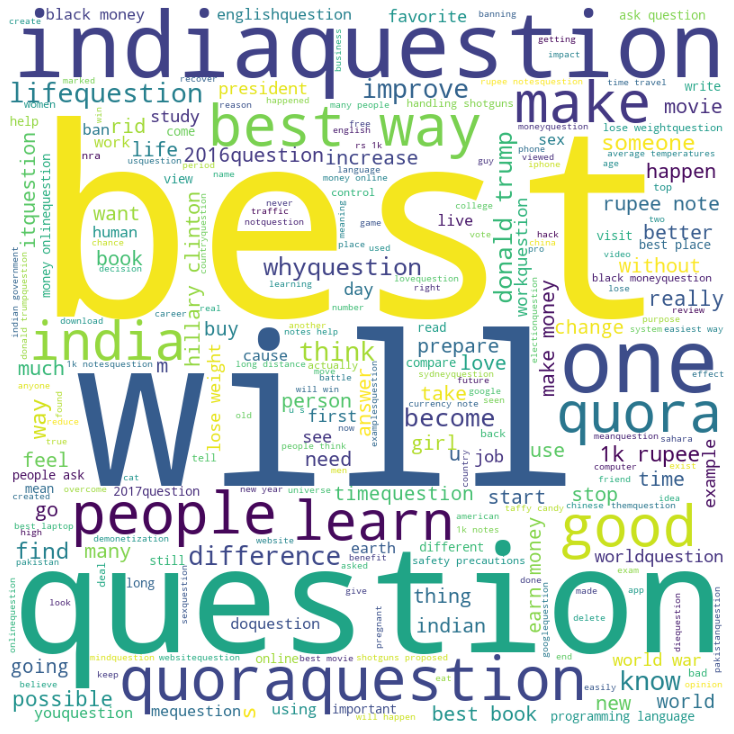

In [131]:
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in p:
  # typecaste each val to string
  val = str(val)
  # split the value
  tokens = val.split()
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      max_words=1000,
                      min_font_size = 10).generate(comment_words)
# plot the WordCloud image
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(10) # set height
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Word Clouds generated from non duplicate pair question's text

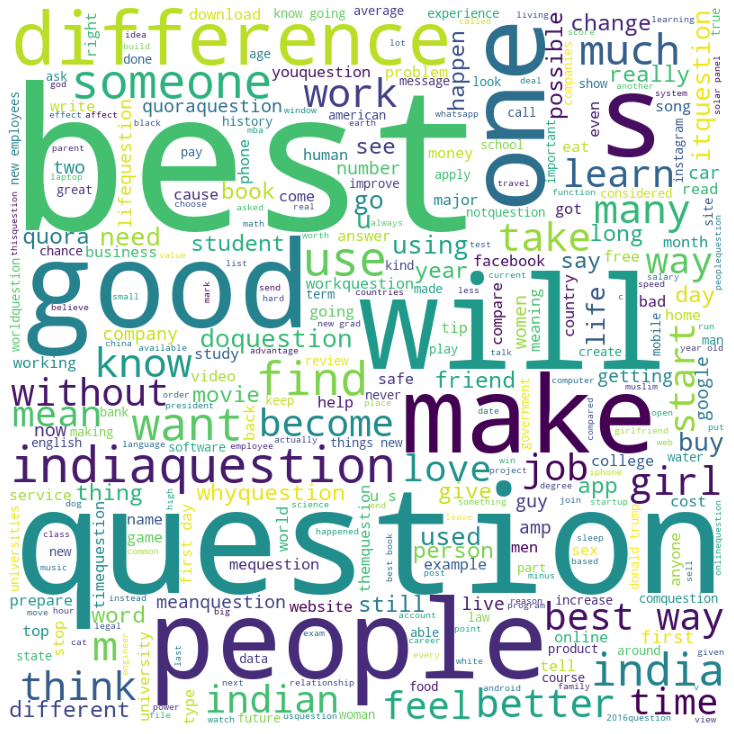

In [132]:
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in n:
  # typecaste each val to string
  val = str(val)
  # split the value
  tokens = val.split()
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      max_words=1000,
                      min_font_size = 10).generate(comment_words)
# plot the WordCloud image
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(10) # set height
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### 2. Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']

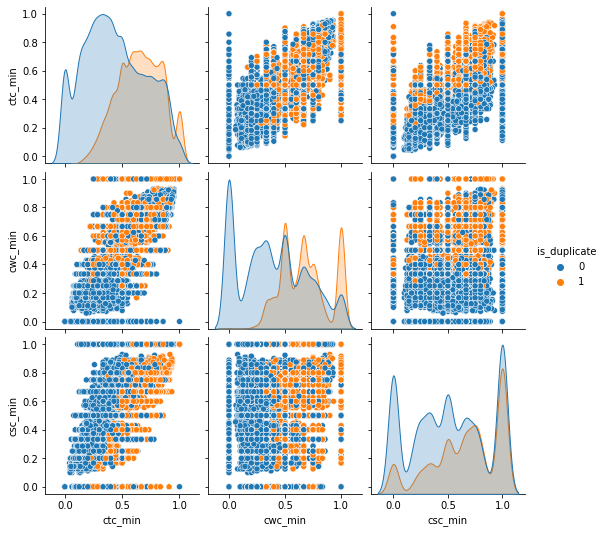

In [141]:
sns.pairplot(new_data[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')
plt.show()

### 3. Pair plot of features ['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']

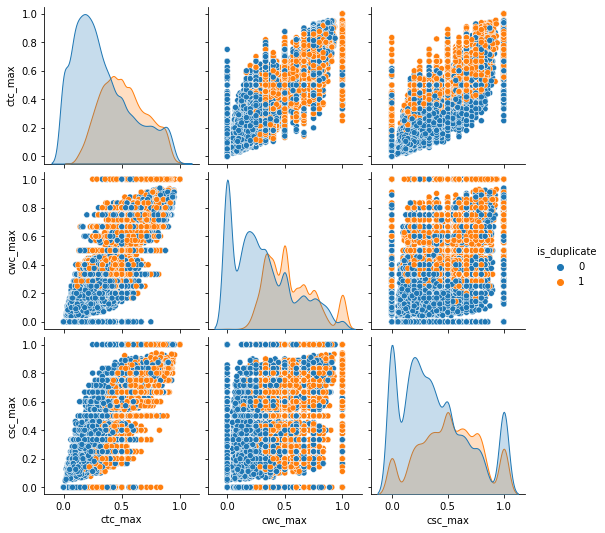

In [142]:
sns.pairplot(new_data[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')
plt.show()

### 4. Pair plot of features ['last_word_eq', 'first_word_eq', 'is_duplicate']

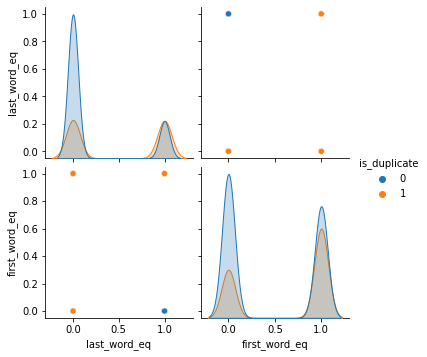

In [147]:
sns.pairplot(new_data[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')
plt.show()

### 5. Pair plot of features ['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']

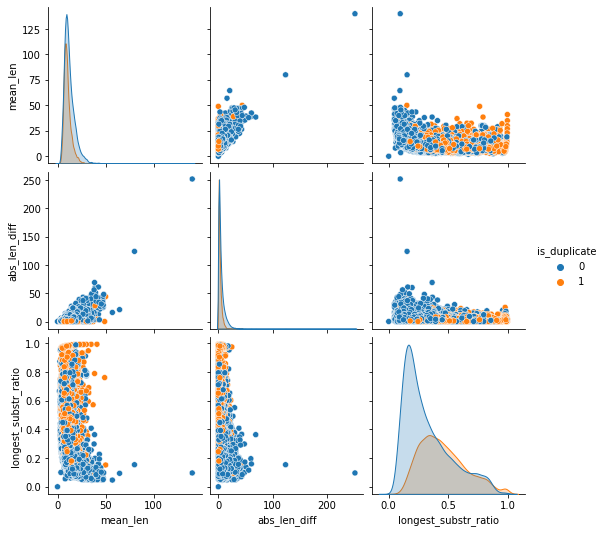

In [146]:
sns.pairplot(new_data[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

### 6. Pair plot of features ['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']

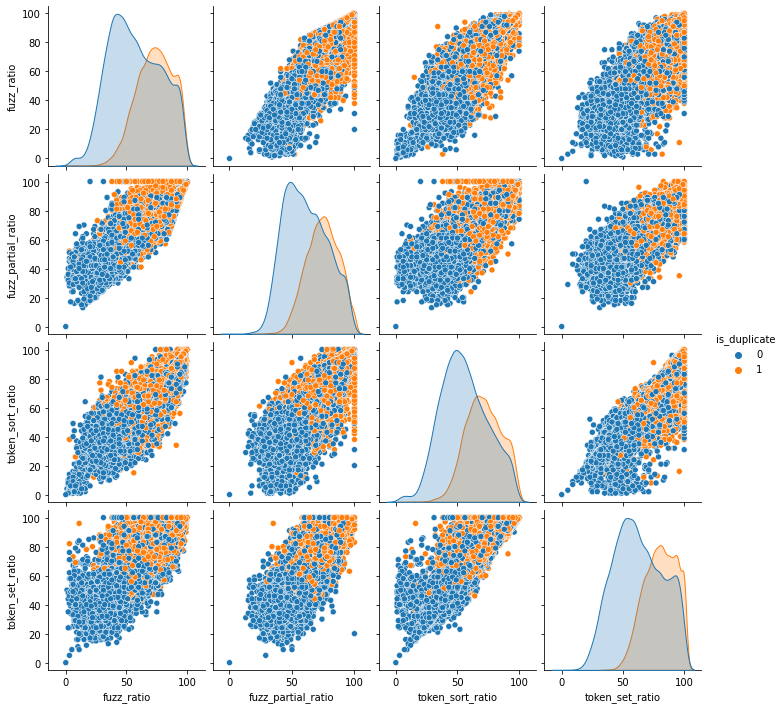

In [145]:
sns.pairplot(new_data[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

### 7. Pair plot of features ['cctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']

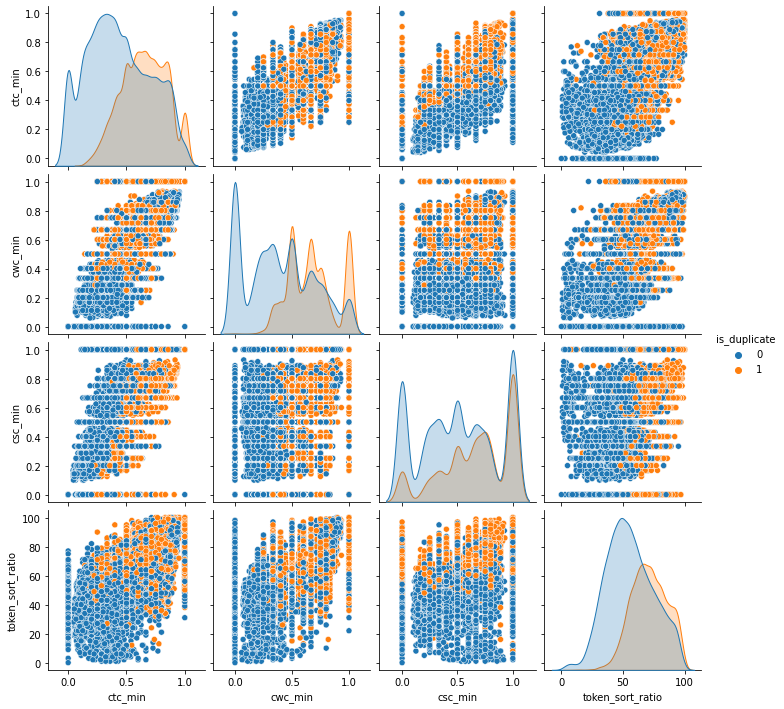

In [144]:
p_p = new_data.shape[0]
sns.pairplot(new_data[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:p_p], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

### 8. Distribution of the token_sort_ratio

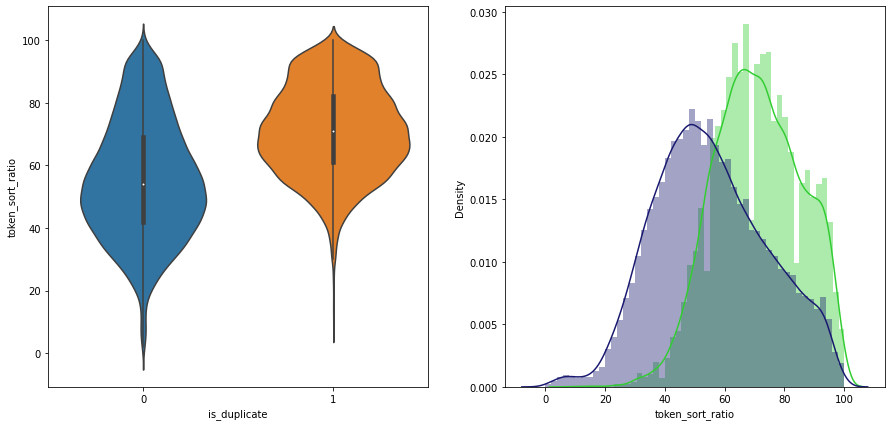

In [138]:

plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = new_data[0:] , )

plt.subplot(1,2,2)
sns.distplot(new_data[new_data['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'limegreen')
sns.distplot(new_data[new_data['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'midnightblue' )
plt.show()

### 9. Distribution of the fuzz_ratio

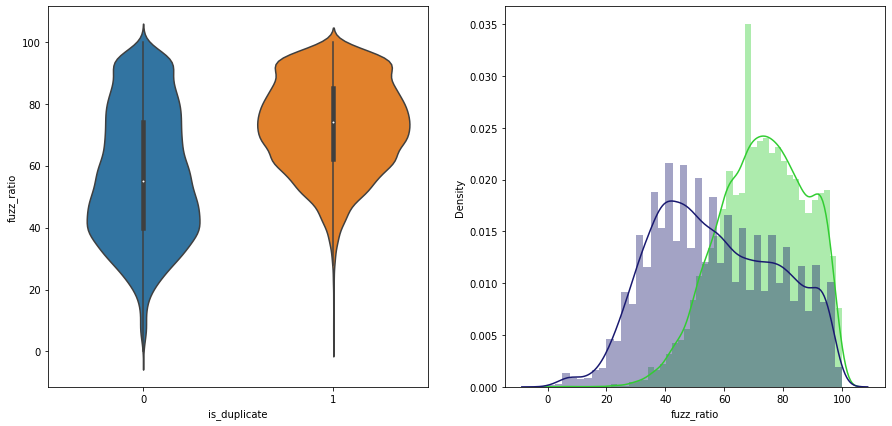

In [139]:
plt.figure(figsize=(15, 7))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = new_data[0:] , )

plt.subplot(1,2,2)
sns.distplot(new_data[new_data['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'limegreen')
sns.distplot(new_data[new_data['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'midnightblue' )
plt.show()

### Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention


In [20]:

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_data[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_data['is_duplicate'].values

In [149]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.049s...
[t-SNE] Computed neighbors for 30000 samples in 4.254s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

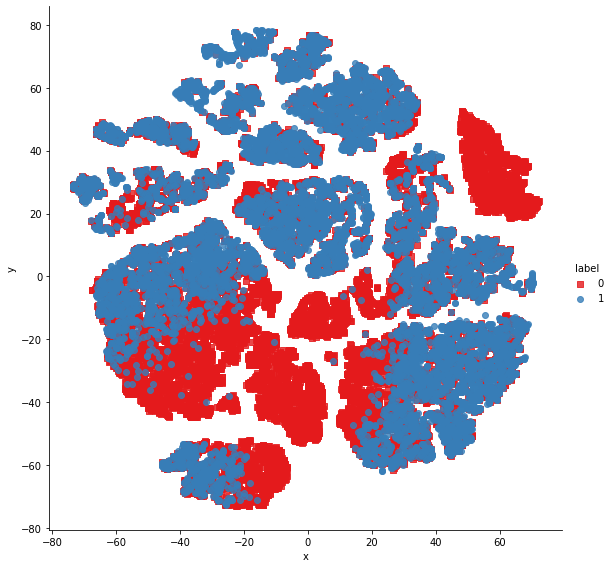

In [150]:
x_data = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_data, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.show()

In [151]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.050s...
[t-SNE] Computed neighbors for 30000 samples in 4.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [152]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')
plt.show()

## Dataset splitting
Spliting the above dataset into two datasets one is question dataset which contains question1 and question2 and the another is numeric dataset which contains is_duplicate, qs1_len, qs2_len, qs1_num_words, qs2_num_words, word_common, word_total, word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min, ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio, fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio.

In [153]:
new_data.columns.values  

array(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'qs1_len', 'qs2_len', 'qs1_num_words', 'qs2_num_words',
       'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'], dtype=object)

In [21]:
qs_data=new_data[["question1" ,	"question2"]]
num_data=new_data[['is_duplicate','qs1_len', 'qs2_len', 'qs1_num_words', 'qs2_num_words', 'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq','first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio', 'token_set_ratio']]

In [157]:
print("The question dataset is given by: \n")
qs_data[:]

The question dataset is given by: 



question1  \
398782  what is the best marketing automation tool for...   
115086  i am poor but i want to invest  what should i ...   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235         consequences of bhopal gas tragedyquestion   
...                                                   ...   
243932  what are some good web scraping tutorialsquestion   
91980   can i apply for internet banking in sbi withou...   
266955  how much he laundry detergent do you use in a ...   
71112   what is the best way to understand and learn m...   
312470  what would the modiminusled government do in c...   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas trag...  
...                                                   ...  
243932   what are some good web scraping programsquestion  
91980   i have internet banking kit of sbi but it has ...  
266955  can i use regular dawn dishsoap in my dishwash...  
71112   what are some of the best ways to learn mathqu...  
312470  if pakistan mounts a 26slash11 type attack aga...  

[30000 rows x 2 columns]

In [158]:
print("The numeric dataset is given by: \n")
num_data[:]

The numeric dataset is given by: 



is_duplicate  qs1_len  qs2_len  qs1_num_words  qs2_num_words  \
398782             1       87       88             12             12   
115086             0       56       64             13             16   
327711             0      112      127             28             21   
367788             0       66      153             14             32   
151235             0       42       57              5              9   
...              ...      ...      ...            ...            ...   
243932             1       49       48              7              7   
91980              0       75       79             12             17   
266955             0       80      112             14             18   
71112              1       58       52             10             10   
312470             1      102       88             15             16   

        word_common  word_total  word_share   cwc_min   cwc_max  ...  \
398782           11          24        0.46  0.857131  0.857131  ...   
115086            8          23        0.35  0.749981  0.599988  ...   
327711            4          36        0.11  0.000000  0.000000  ...   
367788            1          32        0.03  0.000000  0.000000  ...   
151235            3          13        0.23  0.749981  0.599988  ...   
...             ...         ...         ...       ...       ...  ...   
243932            6          14        0.43  0.749981  0.749981  ...   
91980             4          27        0.15  0.499992  0.428565  ...   
266955            4          30        0.13  0.249997  0.249997  ...   
71112             5          20        0.25  0.499988  0.399992  ...   
312470            5          29        0.17  0.444440  0.399996  ...   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782  0.916659           1.0            1.0           0.0      12.0   
115086  0.466664           1.0            1.0           3.0      13.5   
327711  0.115384           0.0            0.0           6.0      23.0   
367788  0.000000           0.0            0.0          17.0      21.5   
151235  0.333330           1.0            0.0           4.0       7.0   
...          ...           ...            ...           ...       ...   
243932  0.857131           0.0            1.0           0.0       7.0   
91980   0.249998           0.0            0.0           4.0      14.0   
266955  0.235293           0.0            0.0           3.0      15.5   
71112   0.499995           0.0            1.0           0.0      10.0   
312470  0.333331           0.0            0.0           1.0      14.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              0.784091          99                  99   
115086              0.228070          73                  72   
327711              0.079646          31                  36   
367788              0.119403          34                  44   
151235              0.627907          63                  76   
...                      ...         ...                 ...   
243932              0.653061          91                  88   
91980               0.236842          60                  58   
266955              0.123457          30                  36   
71112               0.245283          75                  69   
312470              0.179775          49                  59   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                69               79  
327711                33               43  
367788                31               36  
151235                57               76  
...                  ...              ...  
243932                64               91  
91980                 43               52  
266955                49               46  
71112                 75               78  
312470                65               65  

[30000 rows x 23 columns]

In [159]:
print("The shapes of the new 2 data frame is given by: \n")

print("Question dataset : ", qs_data.shape)

print("\nNumeric dataset: ", num_data.shape)

The shapes of the new 2 data frame is given by: 

Question dataset :  (30000, 2)

Numeric dataset:  (30000, 23)


## Text merging

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
questions=(list(qs_data["question1"])+list(qs_data["question2"]))
cove=CountVectorizer(max_features=3000)
qs1_array,qs2_array=np.vsplit(cove.fit_transform(questions).toarray(),2)

In [28]:
df1=pd.DataFrame(qs1_array, index=qs_data.index)
df2=pd.DataFrame(qs2_array, index=qs_data.index)
temp_data=pd.concat([df1, df2], axis=1)

In [163]:
print("The shape of the temporary dataset is : \n ")
temp_data.shape

The shape of the temporary dataset is : 
 


(30000, 6000)

In [29]:
final_data=pd.concat([num_data,temp_data], axis=1)

In [165]:
print("The final dataset is given by: \n")

final_data.head()

The final dataset is given by: 



is_duplicate  qs1_len  qs2_len  qs1_num_words  qs2_num_words  \
398782             1       87       88             12             12   
115086             0       56       64             13             16   
327711             0      112      127             28             21   
367788             0       66      153             14             32   
151235             0       42       57              5              9   

        word_common  word_total  word_share   cwc_min   cwc_max  ...  2990  \
398782           11          24        0.46  0.857131  0.857131  ...     0   
115086            8          23        0.35  0.749981  0.599988  ...     0   
327711            4          36        0.11  0.000000  0.000000  ...     0   
367788            1          32        0.03  0.000000  0.000000  ...     0   
151235            3          13        0.23  0.749981  0.599988  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
398782     0     0     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0     0     0  
327711     0     0     0     0     0     0     0     0     0  
367788     1     0     0     0     0     0     0     0     0  
151235     0     0     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [166]:
print("The shape of the final dataset is : \n ")
final_data.shape

The shape of the final dataset is : 
 


(30000, 6023)

## Model fitting And Prediction

In [22]:
from sklearn.model_selection import train_test_split

In [30]:
x= final_data.iloc[:,1:].values  # it will select all rows but the first column will be excluded.
y=final_data.iloc[:,0].values    # # it will get column 0 as a SERIES of shape (n,) 

In [31]:
X_train,X_test, y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=1)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Random Forest Classifier

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rnfcl= RandomForestClassifier()
rnfcl.fit(X_train, y_train)
y_pred=rnfcl.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print("The accuracy score of the random forest classfier is : ",acc)

The accuracy score of the random forest classfier is :  0.7876666666666666


In [174]:
cnm=confusion_matrix(y_test,y_pred)
print("The confusion matrix of the random forest classfier is : \n ")
cnm

The confusion matrix of the random forest classfier is : 
 


array([[4817,  873],
       [1038, 2272]])

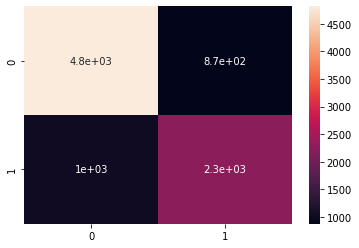

In [175]:
sns.heatmap(cnm, annot=True)
plt.show()

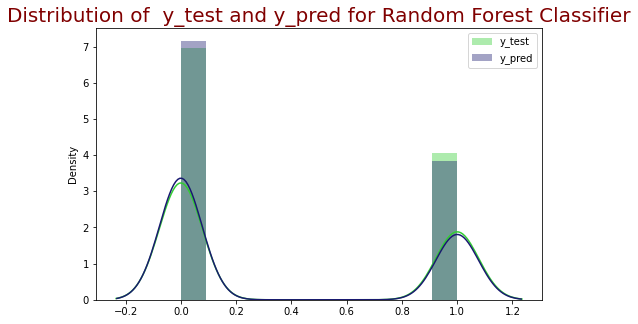

In [176]:
plt.figure(figsize=(8,5))

sns.distplot(y_test, 
             label="y_test",
             color="limegreen")

sns.distplot(y_pred, 
             label="y_pred",
             color="midnightblue")

plt.legend()

plt.title("Distribution of  y_test and y_pred for Random Forest Classifier" ,
          size= 20,
          color="Maroon"
         )



plt.show()       

In [177]:
sample = pd.DataFrame(y_pred,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

Predict  Actual
0        0       0
1        1       1
2        0       0
3        1       0
4        0       0
5        0       0
6        1       1
7        0       0
8        0       0
9        1       1

In [178]:
mean_absolute_error(y_test,y_pred)

0.21233333333333335

In [179]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4607964120230683

### XGB Classifier

In [34]:
from xgboost import XGBClassifier

In [35]:
xgbcl= XGBClassifier()
xgbcl.fit(X_train, y_train)
y_pred1=xgbcl.predict(X_test)
acc1= accuracy_score(y_test, y_pred1)
print("The accuracy score of the XGB classfier is : ",acc1)

The accuracy score of the XGB classfier is :  0.7613333333333333


In [37]:
cnm1=confusion_matrix(y_test,y_pred1)
print("The confusion matrix of the random forest classfier is : \n ")
cnm1

The confusion matrix of the random forest classfier is : 
 


array([[4332, 1358],
       [ 790, 2520]])

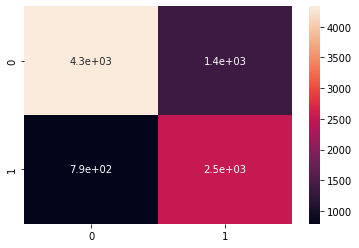

In [38]:
sns.heatmap(cnm1, annot=True)
plt.show()

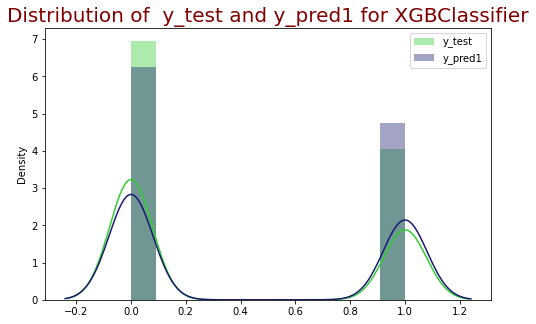

In [40]:
plt.figure(figsize=(8,5))

sns.distplot(y_test, 
             label="y_test",
             color="limegreen")

sns.distplot(y_pred1, 
             label="y_pred1",
             color="midnightblue")

plt.legend()

plt.title("Distribution of  y_test and y_pred1 for XGBClassifier" ,
          size= 20,
          color="Maroon"
         )



plt.show()     

In [41]:
sample = pd.DataFrame(y_pred1,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

Predict  Actual
0        1       0
1        1       1
2        0       0
3        0       0
4        1       0
5        0       0
6        1       1
7        0       0
8        1       0
9        1       1

In [43]:
mean_absolute_error(y_test,y_pred1)

0.23866666666666667

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred1))

0.488535225614967

#### From the above calculations we can see that the accuracy rate of Random Forest Classifier is 0.7876666666666666 and the accuracy rate of XGBClassifier is 0.7613333333333333. Therefore it is clear that the Random Forest Classifier gives the better accuracy rate than XGBClassifier. Therefore Random Forest Classfier is the better choice for this dataset.